# **06. Python Visualization Libraries**

Welcome to our <font color=#f2cc38>**Sixth Content Block**</font> in the Python Course! 

Today, after having already introduced Pandas, and how to deal with data on Python, we will be introducing several libraries used to **plot** directly in Python, used to compliment your data analysis workflows directly in Python.

Therefore, we will be covering four different libraries, with different visualizations each:

- Pandas for Data Visualization
- Introduction to MatPlotlib, and main commands
- Seaborn
- Plotly Express

## **01. Pandas for Data Visualization**

Pandas is a great library, and apart from having several functions and methods related to data transformation, as we have seen thus far, it can also be used to directly plot charts, in a simple, accessible way.

Let's see more about that:

In [1]:
import numpy as np
import pandas as pd

In [64]:
# Let's create a fake dataset to visualize
df = pd.DataFrame(np.random.randn(60, 3), columns = ['a b c'.split()])

In [65]:
# we can easily obtain a histogram by running this command:
df.a.hist()

array([[<AxesSubplot:title={'center':"('a',)"}>]], dtype=object)

### **Styling graphs in Pandas**

Before proceeding to see the variability of graphs that we have available, let's first see how we can style our graphs:

 - We do that by first running the **style** function retrieved from matplotlib:

In [66]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df.a.hist()

array([[<AxesSubplot:title={'center':"('a',)"}>]], dtype=object)

In the end, we are using the **matplotlib** customization options in order to cusomize our graphs. See all different available themes in: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

We will be using the ggplot configuration from now onwards.

### **Types of Plots in Pandas**

Our simple plotting options in pandas include the following graphs of interest:

#### **Histogram**

array([[<AxesSubplot:title={'center':"('a',)"}>]], dtype=object)

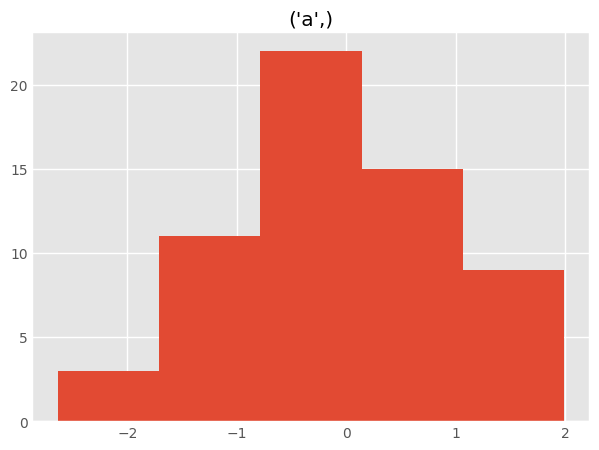

In [67]:
# We can easily regulate the number of bins to use
df.hist(column = 'a', bins = 5)

**Area Chart**

Despite the **hist** plot is accessible directly on the dataframe object, we will need to use **.plot** to access all other graphs:

<AxesSubplot:>

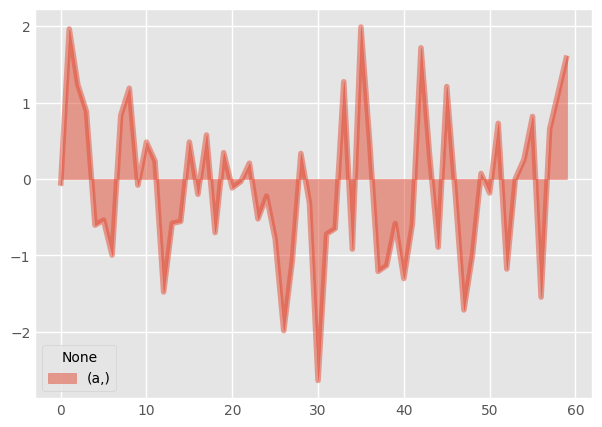

In [68]:
df.a.plot.area(stacked = False)

In [69]:
df[['a', 'b']].plot.area(stacked = False)

<AxesSubplot:>

#### **Bar Plots**

<AxesSubplot:>

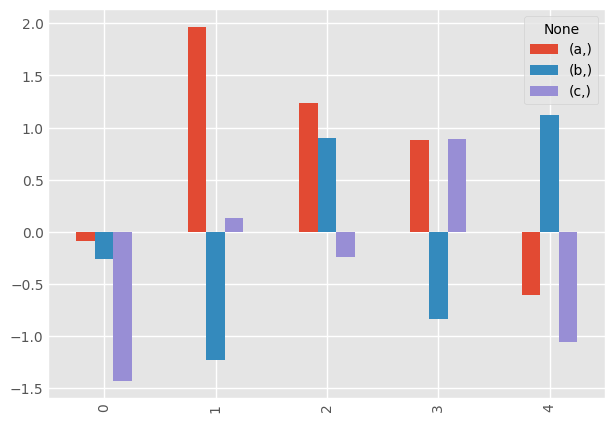

In [70]:
df.iloc[:5,].plot.bar()

<AxesSubplot:>

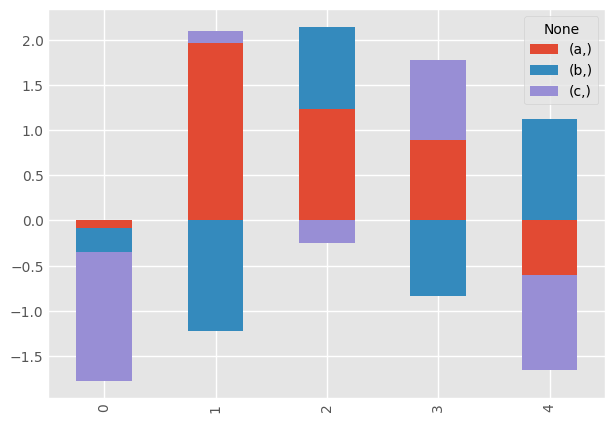

In [71]:
# stacked
df.iloc[:5,].plot.bar(stacked = True)

#### **Line Plot**

<AxesSubplot:title={'center':'Graph'}>

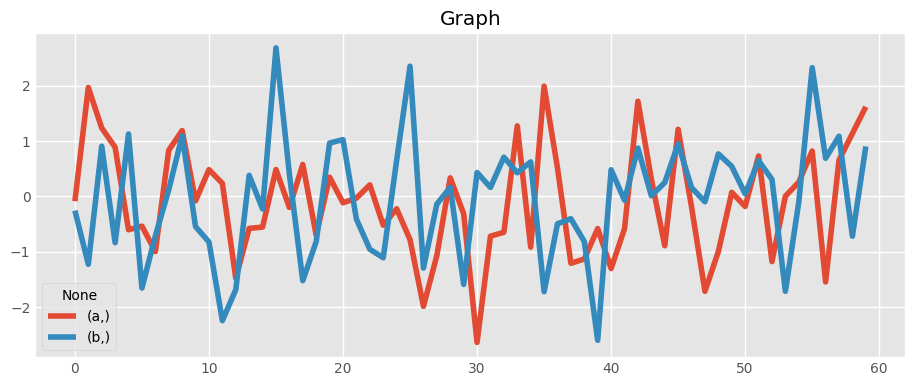

In [72]:
# figsize is a tuple of (w, h)
df[['a', 'b']].plot.line(grid = True, title = 'Graph', figsize = (10, 4))

array([<AxesSubplot:xlabel='Variable', ylabel='Index'>,
       <AxesSubplot:xlabel='Variable', ylabel='Index'>], dtype=object)

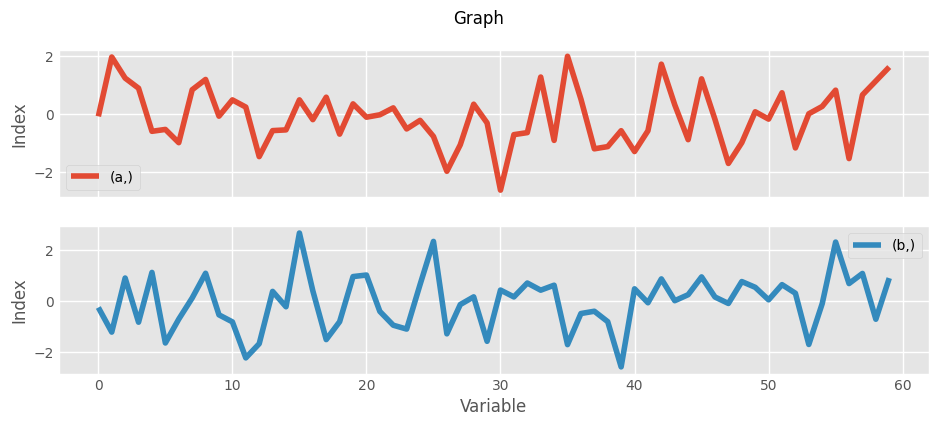

In [73]:
# also, we can present it in subplots
df[['a', 'b']].plot.line(grid = True, title = 'Graph', figsize = (10, 4), subplots = True, xlabel = 'Variable', ylabel = 'Index')

#### **ScatterPlot**

array([<AxesSubplot:xlabel='A', ylabel='B'>], dtype=object)

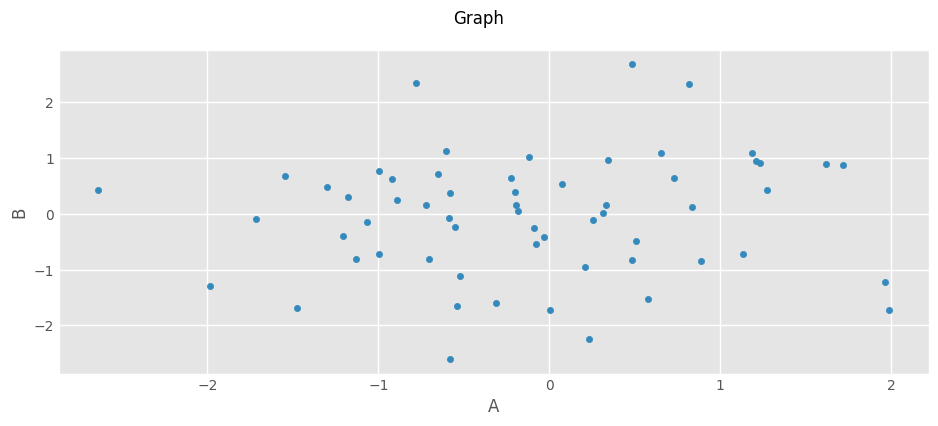

In [74]:
df.plot.scatter(x = 'a', y = 'b', grid = True, title = 'Graph', figsize = (10, 4), subplots = True, xlabel = 'A', ylabel = 'B')

To change colour here, we can also use **colourmaps**:

In [75]:
df.plot.scatter(x = 'a', y = 'c', grid = True, title = 'Graph', figsize = (10, 4), subplots = True, xlabel = 'A', ylabel = 'C',
               s = 100, # size of each point - it can also be a column
               c = 'b', # over which column we select the colour
               colormap = 'inferno')

array([<AxesSubplot:xlabel='A', ylabel='C'>], dtype=object)

You can see different colourmaps here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

#### **Other Plots**

**Box Plots**

<AxesSubplot:>

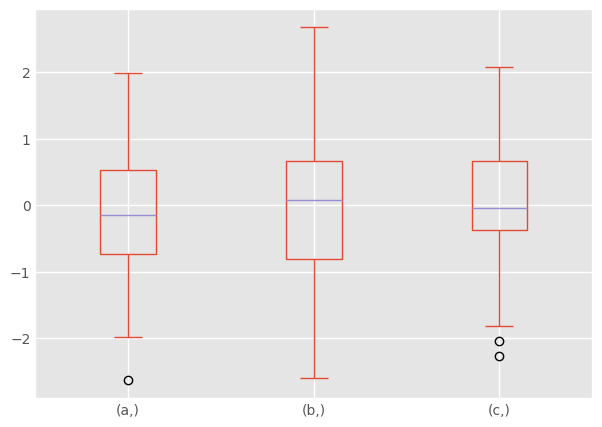

In [76]:
df.plot.box()

**Two-Dimensional Histogram Plots**

In [77]:
# let's redefine our dataframe to make it have more datapoints
df = pd.DataFrame(np.random.randn(50000, 3), columns = ['a b c'.split()])

In [83]:
# We can see clearly how our randomization has induced a gaussian distribution
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

<AxesSubplot:xlabel='a', ylabel='b'>

**KDE Plot**

A KDE plot is a plot that relates a Gaussian distribution t every datapoint in our dataset. This way, it serves as a sort of scatterplot, but of summed gaussia contributions.

<AxesSubplot:ylabel='Density'>

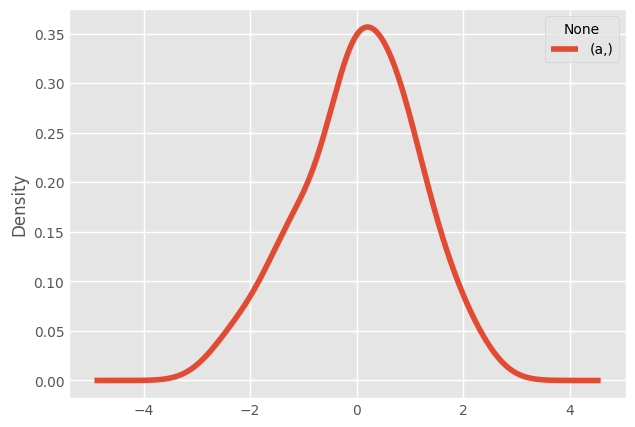

In [86]:
# Let's redefine the df yet again, not to obtain something so Gaussian
df = pd.DataFrame(np.random.randn(60, 3), columns = ['a b c'.split()])
df['a'].plot.kde()

## **02. Introduction to MatPlotLib**

During our demonstration of core default Pandas visualization capabilities, you may have seen that at some point we have used some functionality of the **matplotlib** package.

That's because matplotlib **serves as the core** fundational library of many visualization capabilities in Python. Therefore, despite we are not going to use it just on itself that often, it is well worth it to take a look at some of its core functionalities so as to relate to them while using other visualization libraries, such as seaborn!

In [1]:
import matplotlib.pyplot as plt

What we've seen before looks great, but plotting graphs directly in your script not always works like that! You normally have to use a command like .show() to plot the graph, and many times, while in certain Jupyter Notebook environments, you may have the need to use **inline** (in the following cell) to directly plot graphs in jpynb. It's not hte case, however, with jupyter lab.

In [2]:
%matplotlib inline

In [5]:
# let's get back our randomized dataframe
df = pd.DataFrame(np.random.randn(60, 3), columns = ['a b c'.split()])

In [91]:
df.head()

a         b         c
0  0.640703 -0.696811  2.199517
1 -1.356365 -0.175151 -0.153039
2  1.148395  0.689435 -0.467398
3 -0.215808 -0.984377  1.016269
4  0.210101 -0.077960  1.040693

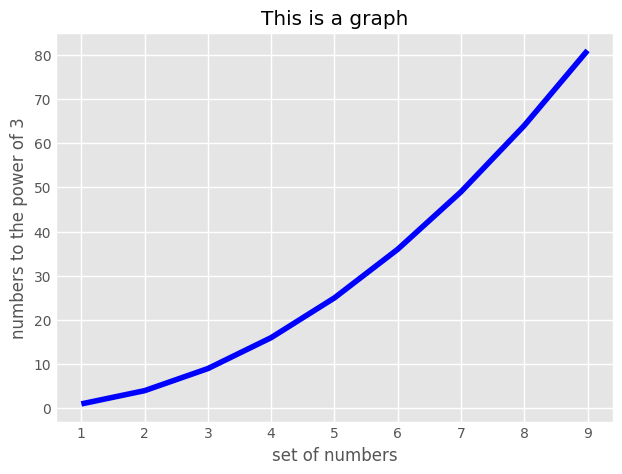

In [99]:
# Now, let's plot our first chart:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9,], [i**2 for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]], 'b') #'b' denotes the colour, it can also be a colour reference like #313131
plt.xlabel('set of numbers')
plt.ylabel('numbers to the power of 2')
plt.title('This is a graph')
plt.show() # for just one graph per cell, we don't really need that in Jpynb

### **Plotting Multiple Graphs**

#### **plt.show() is important!**

When having multiple graphs plotted at a time in a single cell execution in Jupyter Notebook (e.g., by means of a loop, or a function execution, etc.) we need to use plt.show(), else we do not see the results.

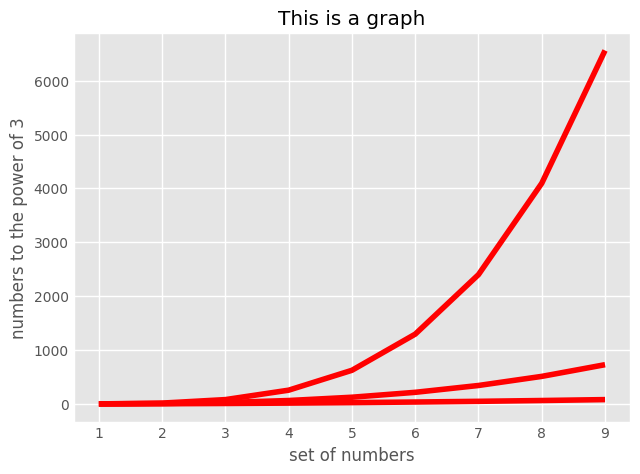

In [101]:
my_list =  [1, 2, 3, 4, 5, 6, 7, 8, 9,]
powers = [2, 3, 4] # to the power of 3, 4 and 2.

for i in powers:
    plt.plot(my_list, [j**i for j in my_list], 'r')
    plt.xlabel('set of numbers')
    plt.ylabel('numbers to the power of 3')
    plt.title('This is a graph')

All are obtained together, **in a same figure**! Instead, when using plt.show()

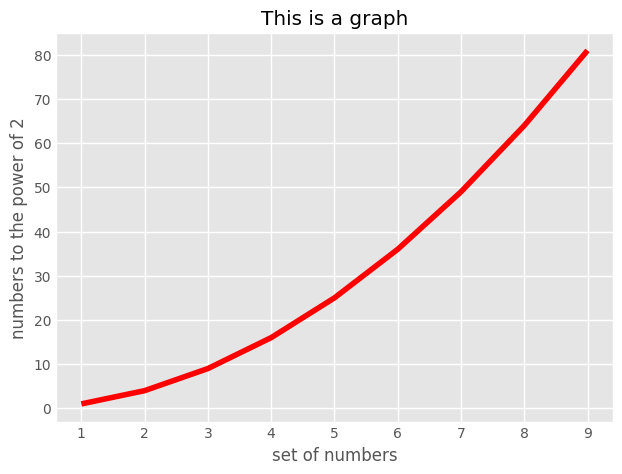

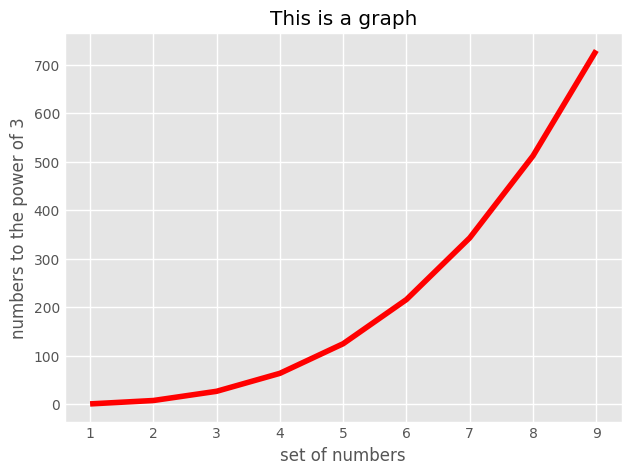

In [103]:
my_list =  [1, 2, 3, 4, 5, 6, 7, 8, 9,]
powers = [2, 3, 4] # to the power of 3, 4 and 2.

for i in powers:
    plt.plot(my_list, [j**i for j in my_list], 'r')
    plt.xlabel('set of numbers')
    plt.ylabel(f'numbers to the power of {i}')
    plt.title('This is a graph')
    plt.show()

#### **SubPlots**

When wanting to plot multiple grapgs, we can also use **Subplots** to plot them in a single figure

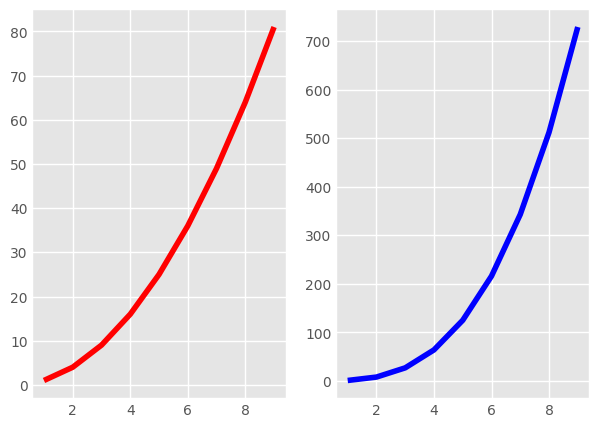

In [107]:
my_list =  [1, 2, 3, 4, 5, 6, 7, 8, 9,]

plt.subplot(1, 2, 1) # this vector indicates (n_rows, n_columns, position in the matrix of said subgraph)
plt.plot(my_list, [j**2 for j in my_list], 'r')
plt.subplot(1, 2, 2)
plt.plot(my_list, [j**3 for j in my_list], 'b')
plt.show()

### **Object Oriented Programming in Matplotlib**

Let's see another approach to plotting graphs in matplotlib.

In [8]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Define x and y
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [j**2 for j in [1, 2, 3, 4, 5, 6, 7, 8, 9]]

# Plot on the defined set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice how we use set_ instead of just xlabel
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Text(0.5, 1.0, 'Set Title')

In [119]:
# Creates blank canvas
fig = plt.figure()

#From the defined axes, we manage to put it in a relative position inside the axes. Look how the numbers tat we used before to defiine the axes are being used now to place them in a relative position to the defined figure
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'g')
axes1.set_xlabel('X_label_ax1')
axes1.set_ylabel('Y_label_ax1')
axes1.set_title('Ax 1 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_ax2')
axes2.set_ylabel('Y_label_ax2')
axes2.set_title('Ax 2 Title');

#### **SubPlotting with this notation of Matplotlib**

Let's see how can we, with this OO approach to matplotlib, use several subplots.

In [123]:
# Empty canvas of 1 by 3 subplots
# We see how the len of axes is 3, and that by caling fig we do return the 3 empty canvases
fig, axes = plt.subplots(nrows=1, ncols=3)
print(len(axes))

3


Now let's fill it with plots

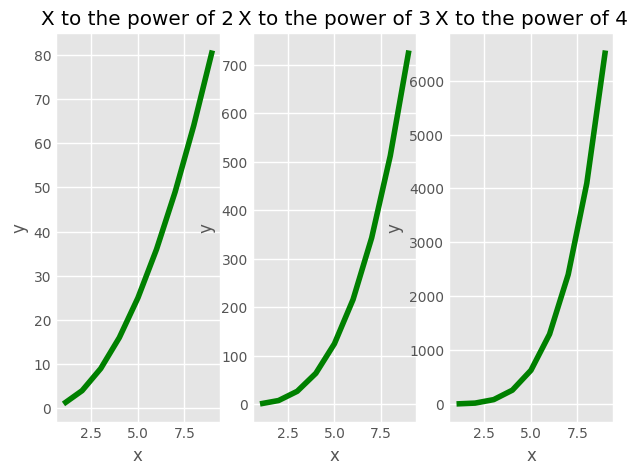

In [126]:
my_list = [1, 2, 3,4 ,5, 6, 7, 8, 9,]

fig, axes = plt.subplots(nrows=1, ncols=3)
for i, ax in enumerate(axes):
    ax.plot(my_list, [j**(i+2) for j in my_list], 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'X to the power of {i+2}')

fig.show()

### **Controlling the aspect ratio**

If we think that a figure is too big, we just use figsize, as before with pandas in-built visualization module!

In [127]:
fig = plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

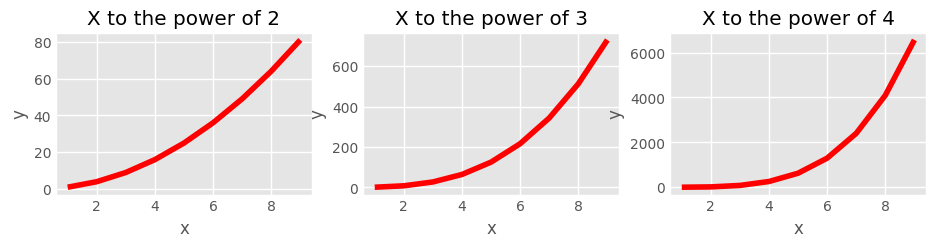

In [130]:
# or, with subplots:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,2))
for i, ax in enumerate(axes):
    ax.plot(my_list, [j**(i+2) for j in my_list], 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'X to the power of {i+2}')

fig.show()

### **How to Export Figures**

To export figures with matplotlib, it's as simple as using .savefig()

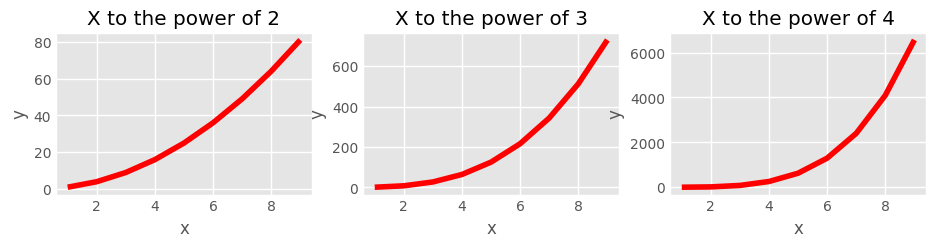

In [135]:
# or, with subplots:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,2))
for i, ax in enumerate(axes):
    ax.plot(my_list, [j**(i+2) for j in my_list], 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'X to the power of {i+2}')

fig.savefig('output/image_1.png', dpi = 300) #dpi is used to control the number of pixels, and can also be used when declaring the fig, after figsize

**Watch out**! In Matplotlib, everytime you are calling **plt.show()** (either explicitly or implicitly i.e., in jpynb) what you are doing is to **deplete** that fig! therefore, you cannot call fig.show() two times in a row and expect to see a result, the same with saving!

### **Controlling Legends**

In [136]:
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [146]:
fig = plt.figure(figsize = (6, 3))

ax = fig.add_axes([0,0,1,1])

ax.plot(x, [5*i for i in x], label="5x")
ax.plot(x, [i**2 for i in x], label="x**2")

See how there is now legend available in the graph. However, we can call it, and also in a way so as to select its position.

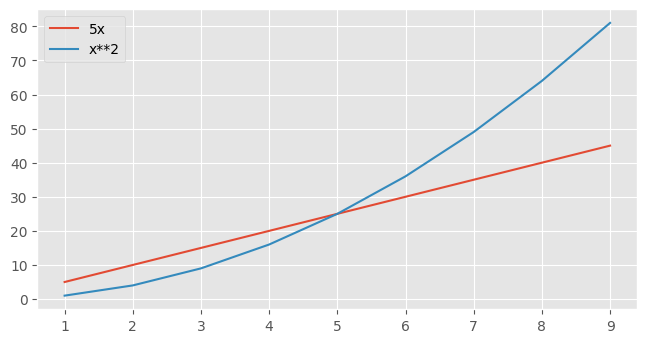

In [9]:
fig = plt.figure(figsize = (6, 3))

ax = fig.add_axes([0,0,1,1])

ax.plot(x, [5*i for i in x], label="5x")
ax.plot(x, [i**2 for i in x], label="x**2")
ax.legend()

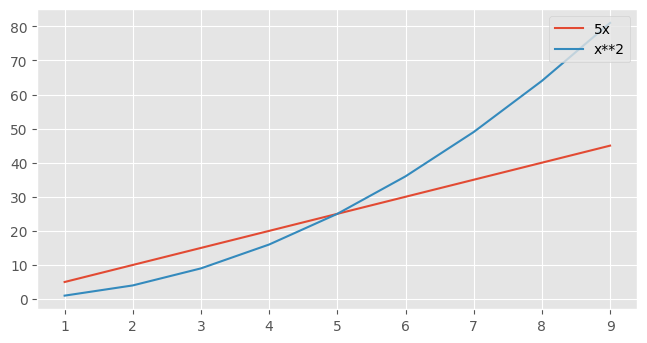

In [10]:
fig = plt.figure(figsize = (6, 3))

ax = fig.add_axes([0,0,1,1])

ax.plot(x, [5*i for i in x], label="5x")
ax.plot(x, [i**2 for i in x], label="x**2")
ax.legend(loc = 1) # with loc, we can change the position in which the legend is placed 

### **Configuring Graph Aesthetics**

How to configure colours, linewidths, linetypes

In [13]:
fig = plt.figure(figsize = (6, 3))

ax = fig.add_axes([0,0,1,1])

ax.plot(x, [5*i for i in x], label="5x", 
        color = 'g', lw = 3, ls = '--', marker = 'o', markersize = 5)
ax.plot(x, [i**2 for i in x], label="x**2",
       color = 'r', lw = 2, ls = '-', marker = 's', markersize = 6)
ax.legend(loc = 1)

### **Other Plots**

We've seen matplotlib in order to get an overview of main graph customization and controlling capabilities, for you to be familiar with them. However, your main plotting efforts will be rather focused on using the Seaborn and PX libraries that we will be reviewing just now. Be mindful, though, that matplotlib is not just used to plot line graphs, but that it can also used to make scatter graphs, histograms, etc. Plus, it has many other relevant customization capablities, that you can review in their documentation: http://www.matplotlib.org

## **03. Seaborn for Data Visualization**

Matplotlib is a core Visualization library for Python that looks to emulate Matlab. That means, that its core aim is not to plot data on itself, but that it rather considers all kinds of visualizations - think about what we've seen in the previous section, plotting mathematical functions. However, **Seaborn**, as described in their own website, is a python library specifically targeted to help explore and understand data. Therefore, it is quite a **data-centric** library. Plus, as aforementioned, it is built on top of matplotlib, for which it was necessary to learn about its fundamentals, and it integrates closely with pandas data structures.

Let's begin with it.

In [2]:
# always common practice to import it as sns
import seaborn as sns

First, we will set the main visual theme from which to work with from now on, plus we will import one of its default datasets for exploration.

In [201]:
sns.set_theme(palette='rocket')

In [199]:
# we load the titanic dataset, a very popular beginner dataset that we will see in other classes later on, used to see the characteristics of passengers 
# that survived, or not, during the titanic crash
df = sns.load_dataset('titanic')

In [200]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

### **03.1. Distribution plots with Seaborn**

Let's first discuss **Distrbution plots** i.e., plots used to plot different numerical variables between each other. As an example, think of an histogram!

#### **Histplot**

Histplot is used to plot an histogram of a variable in a dataframe. therefore, it can be used to see the distribution of values in that variable across the number of cumulated datapoints for that variable, on the X axis.

Apart from **Histlot**, there's a similar function to achieve this representation, **Displot**: https://seaborn.pydata.org/generated/seaborn.histplot.html

<AxesSubplot:xlabel='age', ylabel='Count'>

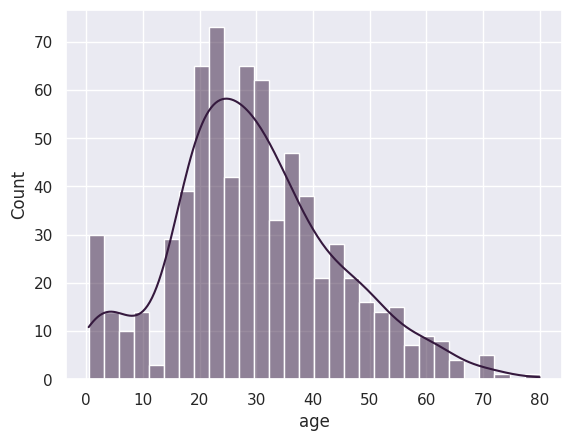

In [113]:
sns.histplot(df.age, bins = 30, kde = True) # by using KDE true, we obtain the KDE representation. Default is False.

#### **ScatterPlot and RegPlot**

A ScatterPLot is used to see the dispersion of datapoints concerning mostly two continuous variables across a Cartesian space.

With RegPlot, on top of that scattered dispersion map, we add a linear regression fit in order to see the linear tendency of our points in the dataset, for the two specified variables.

In [202]:
sns.scatterplot(data = df, x = 'age', y = 'fare')

<AxesSubplot:xlabel='age', ylabel='fare'>

<AxesSubplot:xlabel='age', ylabel='fare'>

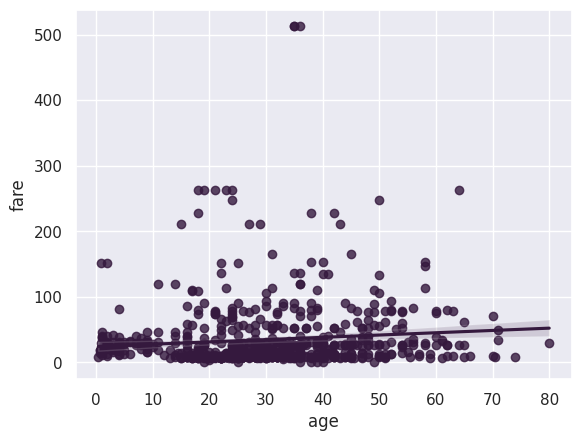

In [203]:
sns.regplot(data = df, x = 'age', y = 'fare')

#### **Plotting two variables at a time: JointPlot**

A JointPlot is a useful function to plot the correlation among two variables, plus both its histograms, in an x-y plane. 

There's different ways of getting to see that correlation, be it with a scatter plot, an hexagonal plot, a linear regression plot, etc.

Let's see about it:

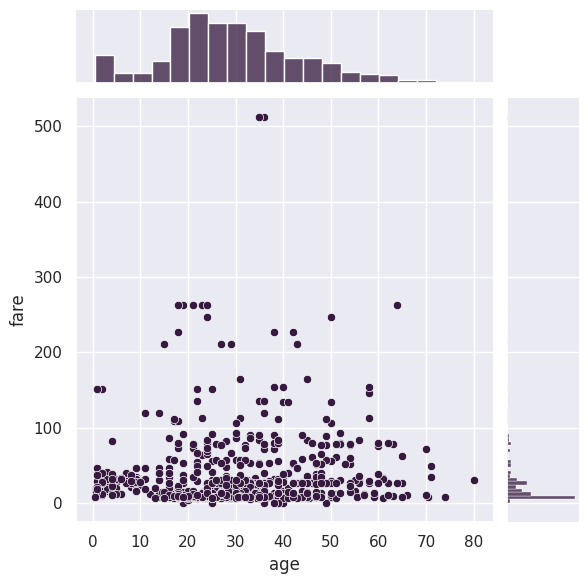

In [43]:
sns.jointplot(data = df, x = 'age', y = 'fare')

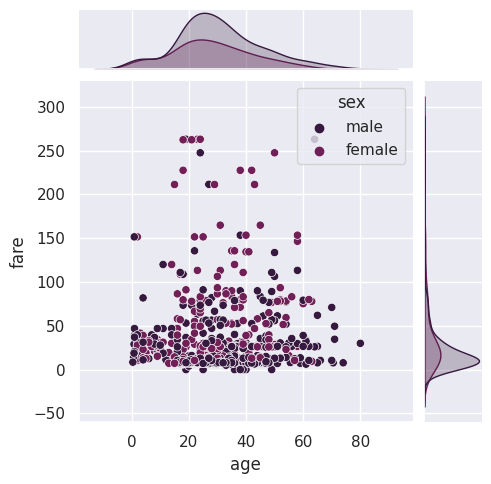

In [48]:
# Let's try to take out outliers manually, to see it better, plus formatting some of the graphs options

sns.jointplot(data = df[df.fare < 500], x = 'age', y = 'fare', hue = 'sex', height = 5)

Now that's better! From both attributes that we used:
 
 - Height controls the size of the graph, given jointplot is a squared graph (it has no width).
 - **Hue** is the parameter, found in many of sns' graphs, to control the colour of the datapoints.
 
We will change the palette again, to get to see it beter. Plus, we can see that te default representation is a scatterplot, but we can use many more:

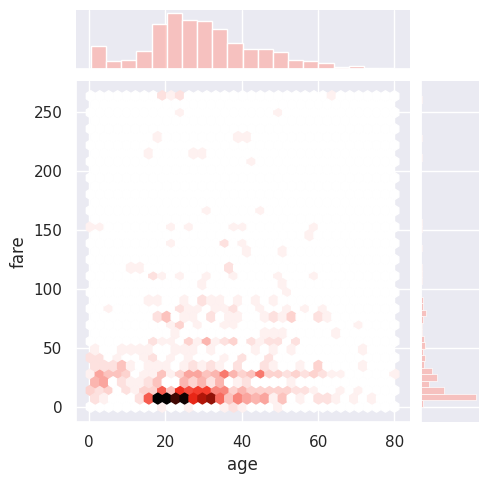

In [60]:
# Let's try to take out outliers manually, to see it better, plus formatting some of the graphs options
sns.set_theme(palette = 'Pastel1')
sns.jointplot(data = df[df.fare < 500], x = 'age', y = 'fare', height = 5,
             kind = 'hex');

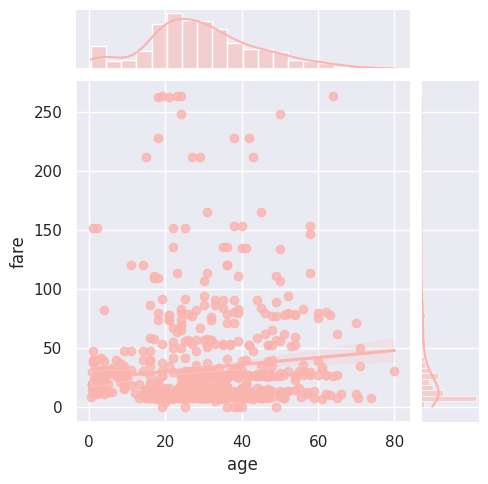

In [61]:
# Let's try to take out outliers manually, to see it better, plus formatting some of the graphs options
sns.jointplot(data = df[df.fare < 500], x = 'age', y = 'fare', height = 5,
             kind = 'reg');

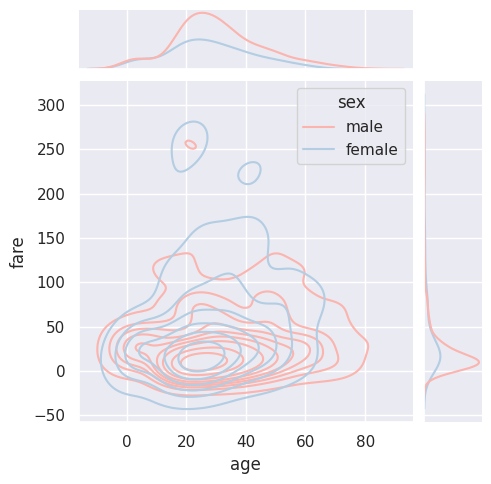

In [62]:
# Let's try to take out outliers manually, to see it better, plus formatting some of the graphs options
sns.jointplot(data = df[df.fare < 500], x = 'age', y = 'fare', height = 5, hue='sex',
             kind = 'kde');

In summary, jointplot is a super good option to get to see the correlation between two numerical variables!

### **Exploring the Correlation between multiple variables at a time - Pairplot**

Pairplot is a seaborn function that extrapolates the concept of the jointplot **to all existing numericla variables** in a dataframe. Therefore, what it does is render a matrix o all numerical variables, and the correlation plot of each pair. Let's see about it.

In [64]:
# first, we can see that in our dataframe we just have to real numerical variables, both we have explored before. 
# Let's better import a new one, that has more than two categorical variables, to get the most out of this function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [129]:
df_i = sns.load_dataset('iris')
df_i.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

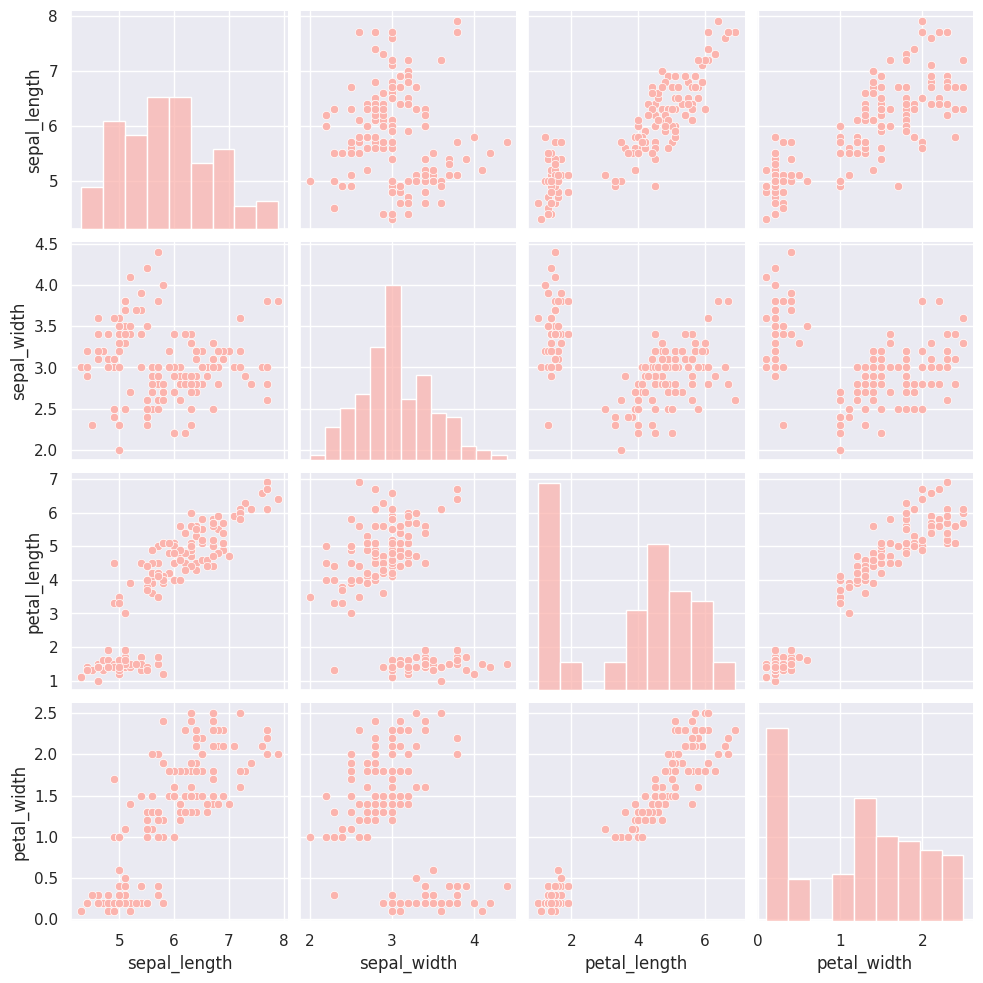

In [76]:
sns.pairplot(df_i);

Great, we can see all the variables plotted in a scattered way between each other!

Now, let's add **further customization** to it.

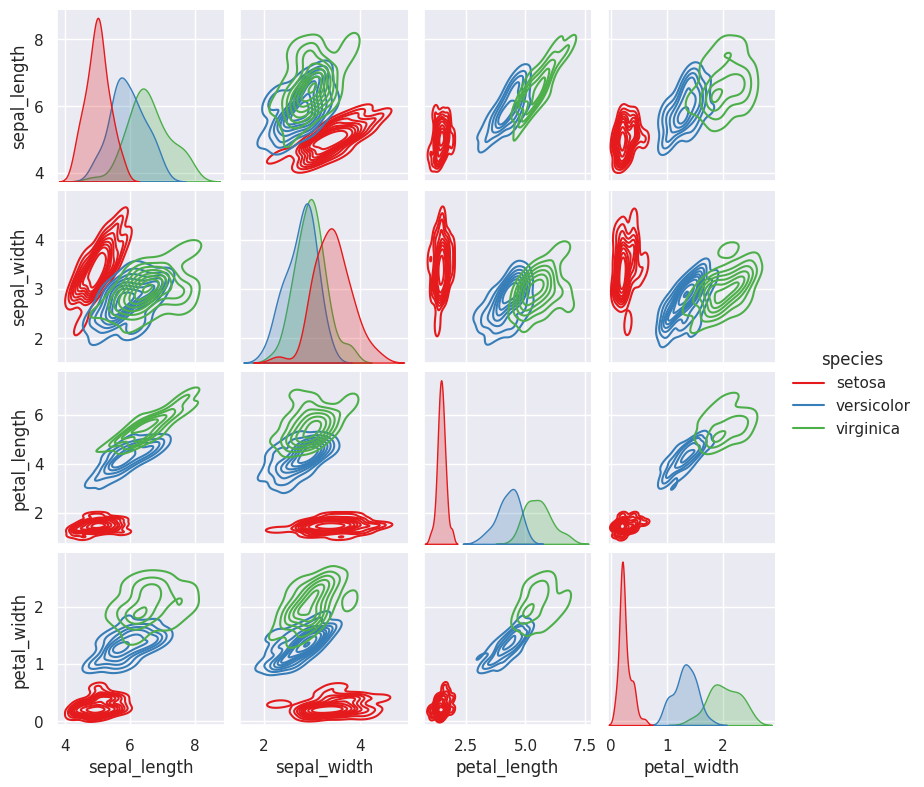

In [ ]:
sns.pairplot(df_i, height = 2, aspect = 1, hue = 'species', kind = 'kde', palette = 'Set1');

This helps us understand that, at the time of predicting whatever numerical value concerning characteristics of flowers, knowing their species goes a long way!! Look how different they are in many regards!

If we had not used the **hue** argument, we'd never been able to find that out. Look on the graph above, how many of the numerical variable correlations seem aribitrary!

There's other **distribution plots** in Seaborn, like a specific KDE one, and so on. You cna further research them, but we have already covered the **3 fundamental ones** you'll be using most!

### **03.2. Categorical Plots with Seaborn**

Now that we have covered how to plot continuous numerical variables, let's see how to combine them with **categorical** ones!

#### **BarPlot and CountPlot**

In SnS, the BarPlot is used to get an aggregation of a specific contiuous variable across a categorical dimension. 

By default, it calculates **the mean** of the dimension, but it can do other calculations. Let's see about it:

In [9]:
# First, let's change palette again, I liked the last one
sns.set_theme(palette = 'Set1')

In [12]:
# Let's refer back to the TItanic dataset
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

As you can see, we can use **Matplotlib** methods to edit our graph! as a matter of fact, sns.barplot() returns an ax object from matplotlib!

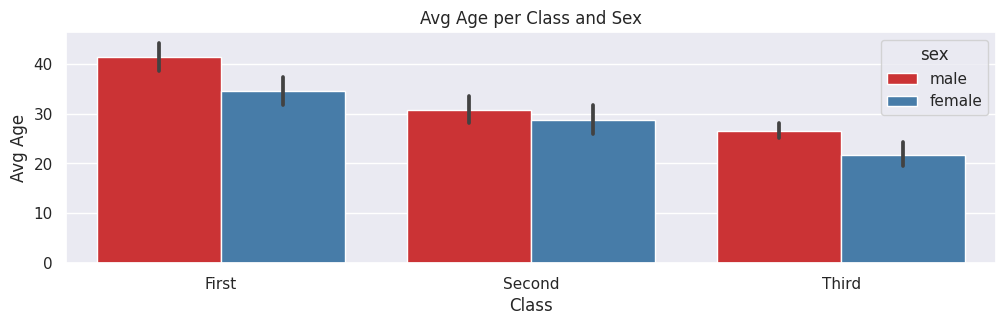

In [64]:
# For instance, establishing the average age of each class travelling in the Titanic
plt.figure(figsize=(12,3))
ax = sns.barplot(data = df, x = 'class', y = 'age', hue = 'sex', estimator = np.mean)
ax.set_xlabel('Class')
ax.set_ylabel('Avg Age')
ax.set_title(f'Avg Age per Class and Sex');
    

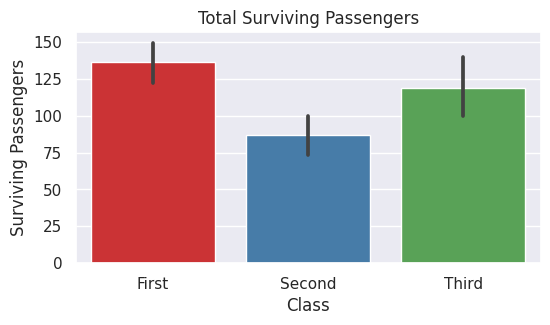

In [66]:
# We can also see how many travellers survived the incident by calling another estimator!
plt.figure(figsize=(6,3))
sns.barplot(data = df, x = 'class', y = 'survived', estimator = np.sum).set(title = 'Total Surviving Passengers', xlabel = 'Class', ylabel = 'Surviving Passengers');

Instead, a **countplot** just gives us a count of how many datapoints consider each of the category values analyzed.

<AxesSubplot:xlabel='survived', ylabel='count'>

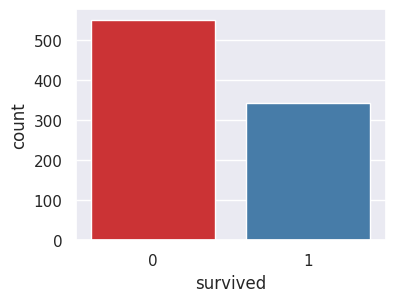

In [70]:
plt.figure(figsize=(4,3)) # see how we're using plt commands over and over again to enact changes, like modifying the figure size!
sns.countplot(x='survived',data=df)

#### **BoxPlot and ViolinPlot**

BoxPlots and ViolinPlots are used to show the density of the distribution of values across a numerical range, according to different dimensions.

**BoxPlot**

In [85]:
plt.figure(figsize=(4,3))
sns.boxplot(data = df, y="age", x="class", hue = 'survived');

you can also change orientations by swithcing x and y, or by using orient = 'h'

**ViolinPlot**

In [74]:
plt.figure(figsize=(4,3))
sns.violinplot(data = df, x="survived", y="age", palette='rainbow');

In [78]:
plt.figure(figsize=(6, 4))
sns.violinplot(data = df, x="survived", y="age", palette='rainbow', hue = 'class');

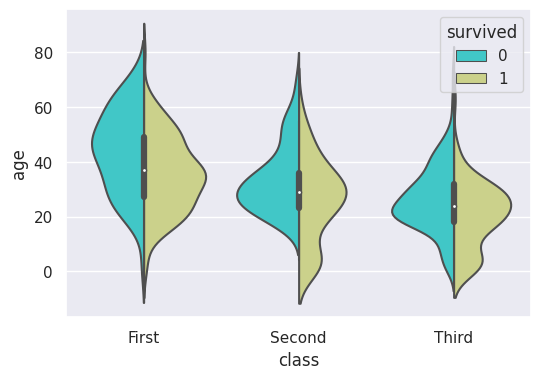

In [80]:
# with two hue values we can use split!
plt.figure(figsize=(6, 4))
sns.violinplot(data = df, hue="survived", y="age", palette='rainbow', x = 'class', split = True);

#### **SwarmPlots and StripPlots**

In the case of SwarmPlots and StriplPlots, we get to see the whole dispersion of datapoints, for different categories, across a numerical axis.

They are quite similar to each other, with the difference that Swarmplots tend to show more the difference in density across the horizontal Axis. A swarmplot would be a sort of "mix" between a tripplot and a violinplot.

**StripPlot**

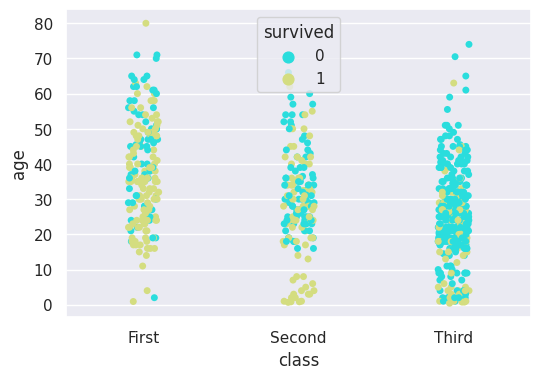

In [88]:
plt.figure(figsize=(6, 4))
sns.stripplot(data = df, hue="survived", y="age", palette='rainbow', x = 'class', jitter = True);

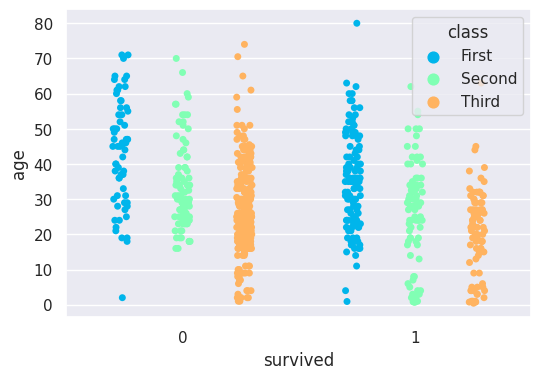

In [90]:
plt.figure(figsize=(6, 4))
sns.stripplot(data = df, x="survived", y="age", palette='rainbow', hue = 'class', jitter = True, dodge = True);

**SwarmPlot**

See how, when having too many datapoints, this plot can trigger warnings considering the suppression of a certain quantity of data points. Maybe it'dbe best for you to use stripplots or violinplts instead in these circumstances.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


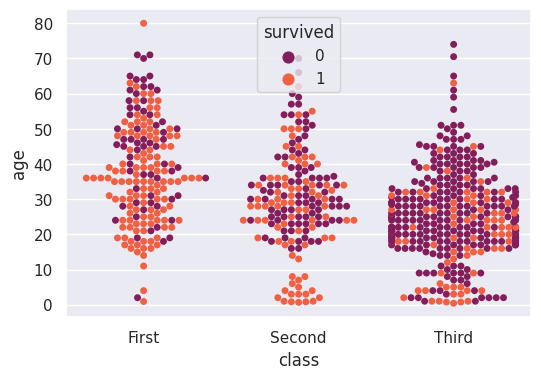

In [94]:
plt.figure(figsize=(6, 4))
sns.swarmplot(data = df, hue="survived", y="age", palette='rocket', x = 'class');

### **03.3. Heatmaps with Seaborn**

Heatmaps can be used in a variety of circustances. A quite useful application is when plotting df.corr(), to see the linear correlation between individual variables based on certain correlation coefficients, like Pearson's, the default one.

/tmp/ipykernel_222/1018027513.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='rocket', annot = True,


<AxesSubplot:>

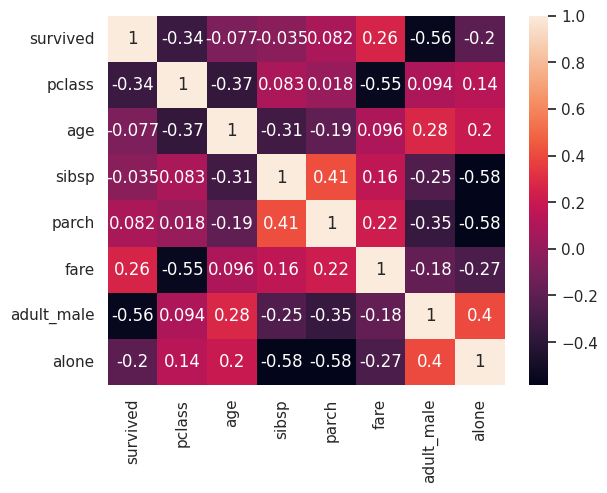

In [98]:
sns.heatmap(df.corr(),cmap='rocket', annot = True,
            # linecolor='white',linewidths=1
           )

You need not use it exclusively with Correlation matrixes of course! There are many more applications, so as to try to see the density of orders per months, for instance, without including annotations.

However, this is a very typical example of when to use it.

We can see, for instance, that passenger class and fare are mildly related to each other!


### **03.4. CatPlot and DisPlot, the Swiss Knives of Seaborn**

Apart from the options that we've seen, as far as plotting categorical variables goes, seaborn has a specific graph type called **CatPlot**. Catplots are used to concentrate all types of categorical graphs we've seen so far into a single object, so that you do not need to remember many function at once, but a single one.

This is done via specifying the argument **kind**.

Plus, by means of using the argument **col**, we can very easily distribute a into different graphs another categorical variable, as if it was another hue. 

Also, we have the same function available for the plotting of non-categorical variables in the shape of **DisPlot**.

Let's see more about that:

#### **CatPlot**

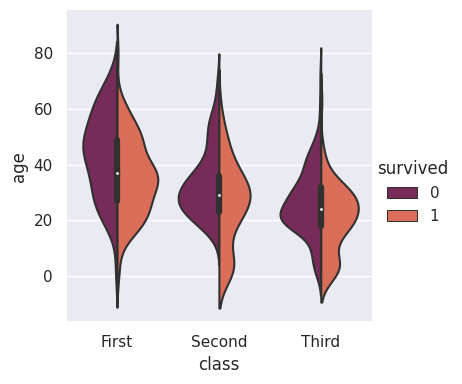

In [106]:
# Seaborn catplot needs to modify its size by means of using height and aspect! Using just the figsize matplotlib command won't work!
sns.catplot(data = df, hue="survived", y="age", palette='rocket', x = 'class', split = True, kind = 'violin', height=4, aspect = 1);

With another categorical variable as multiple columns:

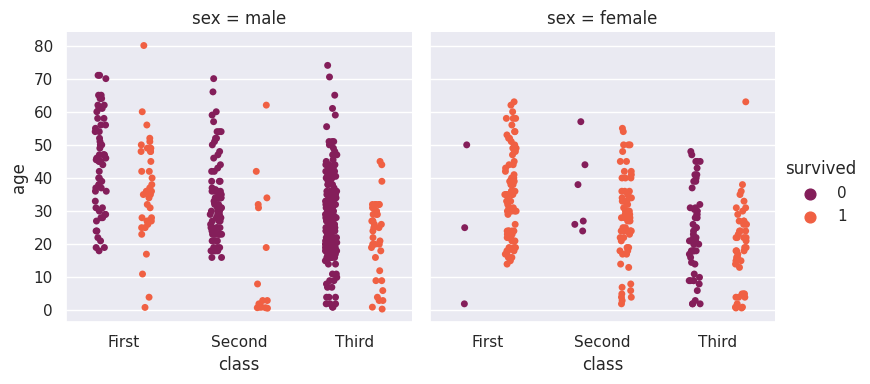

In [111]:
# Seaborn catplot needs to modify its size by means of using height and aspect! Using just the figsize matplotlib command won't work!
sns.catplot(data = df, hue="survived", y="age", palette='rocket', x = 'class', col = 'sex', dodge = True, kind = 'strip', height=4, aspect = 1);

#### **DisPlot**

Actually, the DisPlot function works quite similar to the **CatPlot** function.

By default it renders a histplot (see how we're replicating the graph here from the previous section).

In [120]:
# we can also control its size by means of using height and aspect arguments
sns.displot(df.age, bins = 30, kde = True, height = 4, aspect = 2) # by using KDE true, we obtain the KDE representation. Default is False.

In [124]:
# we can also input two dimensions into it, x and y, in order to obtain bidimensional distributions
sns.displot(x = df.age, y = df.fare, bins = 30, height = 4, aspect = 2)

In [135]:
# also, we can change the kind of plot, as with catplot
sns.displot(data = df_i, x = 'sepal_length', y = 'sepal_width', height = 4, aspect = 2, hue = 'species', kind = 'kde')

## **04. Plotly Express**

Plotly Express is another visualization library that adds interactivity on top of Seaborn's functionalities.

That means, you can **hover** on top of graphs in order to see its values, etc. It allows for other interactive fnctionalities, like directly screencapping the graph, xooming on it, etc. Plus, Plotly Express is also an optimal alternative as for simplicity in visualization.

Let's see some main plots:

In [136]:
import plotly.express as px
# let's load our dataset, this time the iris one
df = px.data.iris()

In [137]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

### **04.1. Distribution Plots**

We'll overview some of them, but you'll see we have more or less the same options available as with seaborn.

**Histogram**

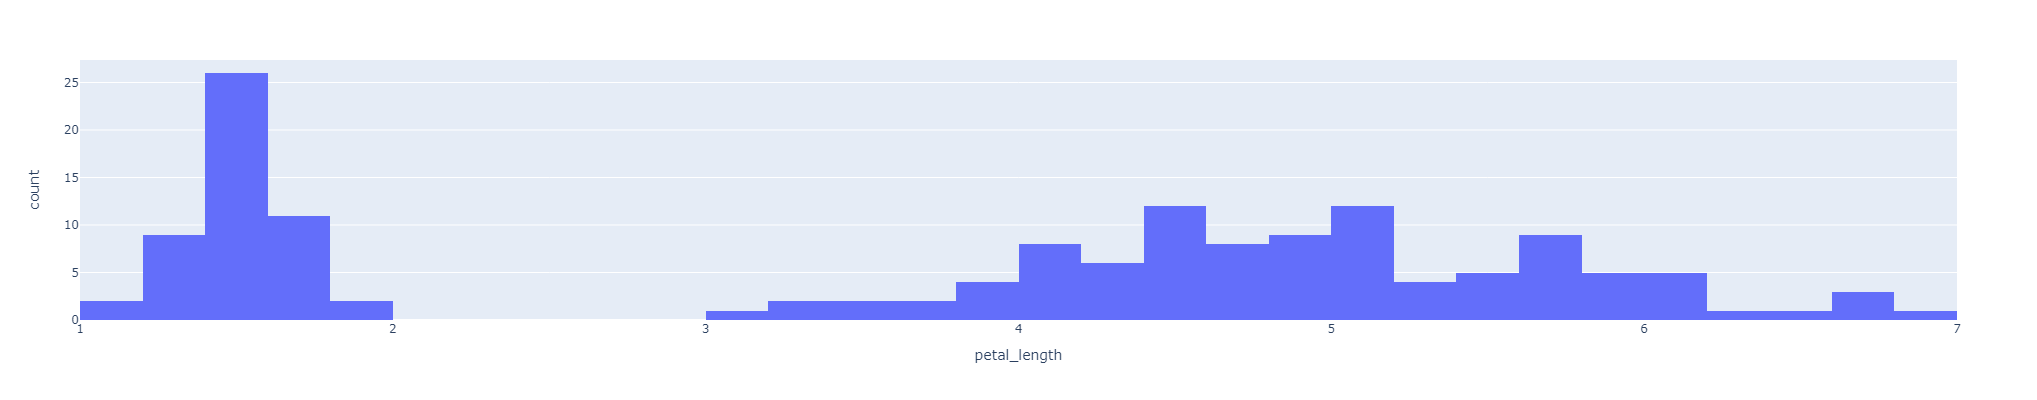

In [144]:
px.histogram(df, x = 'petal_length', nbins = 30, width=800, height=400)

We can also set it with categorical variables, bar spaces, etc.

#### **Scatter Plot**

The scatter plot also has other arguments useful to plot bigger or smaller points with regards to another dimension, etc.

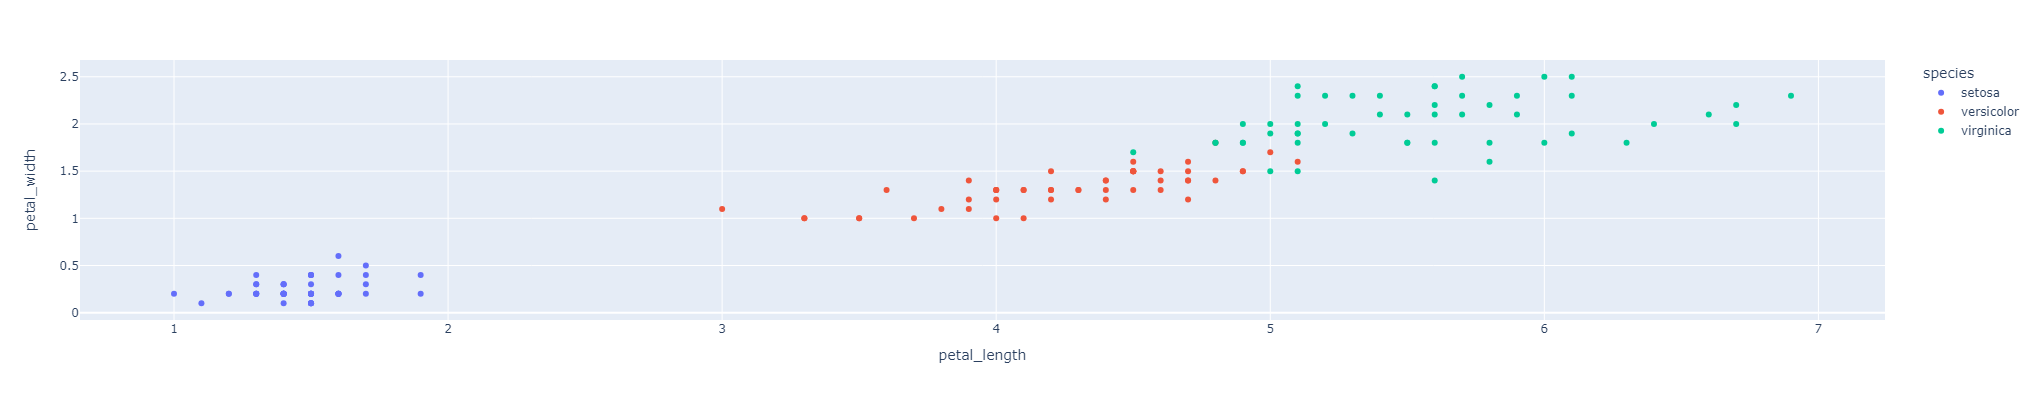

In [150]:
px.scatter(df, x = 'petal_length', y = 'petal_width', color = 'species', width=800, height=400)

**Look at Facet_col**, the argument used to separate into different columns (or rows, for facet_row) graphs relating to a categorical variable.

In [152]:
px.scatter(df, x = 'petal_length', y = 'petal_width', color = 'sepal_length', facet_col = 'species', width=800, height=400)

#### **Other Graphs**

We have also **Line Plots**, **Area Plots** available to plot a linear correlation in time, for instance

### **04.2. Categorical Plots**

Apart from others we've already seen (the histogram is also applicable for categorical variables), let's get an overview on some main categorical functions.

#### **BarPlot**

In [157]:
df2 = px.data.tips()

In [158]:
df2.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

See how we get a massive amount of data here! This is because **Px.Bar** works as a **disaggregated** function with regards to px.histogram. See how we get absolutely all datapoints' contribution, one by one.

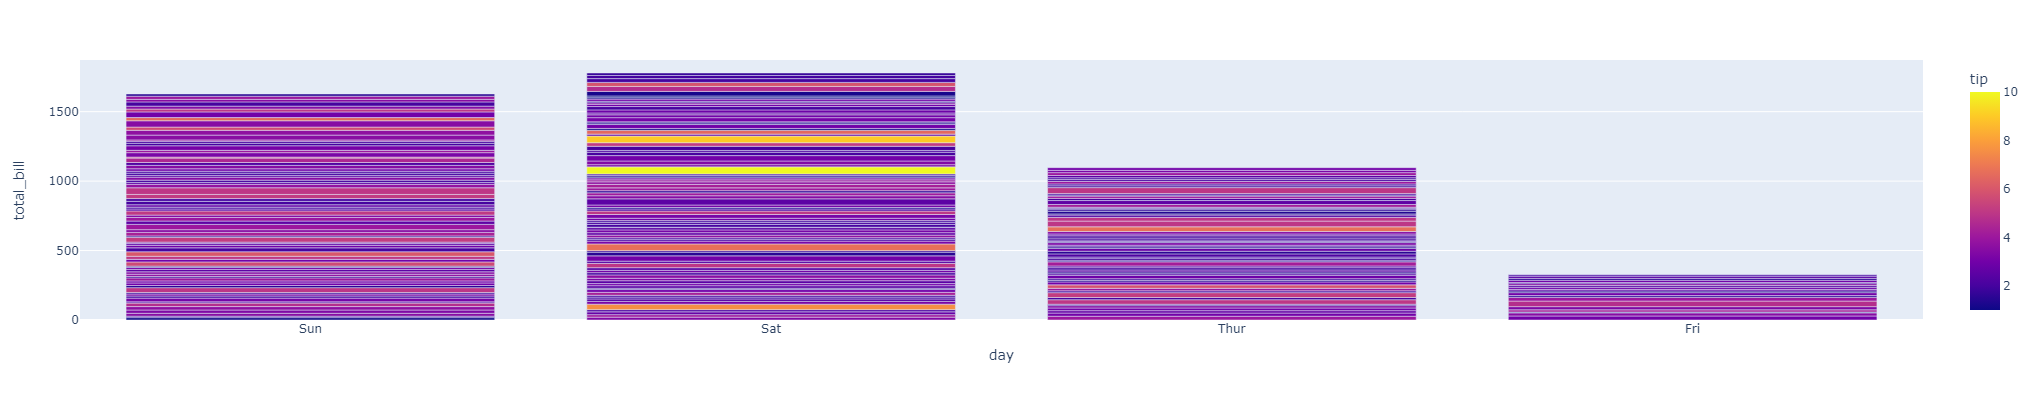

In [159]:
px.bar(df2, x = 'day', y = 'total_bill', color = 'tip', width=800, height=400)

Instead, we can use **Px.Histogram** to get differently aggregated functions. Else, if we want to get the total sum without distracting mini-buckets, or an average, we'll need to use df.groupby to aggregate to the desired level.

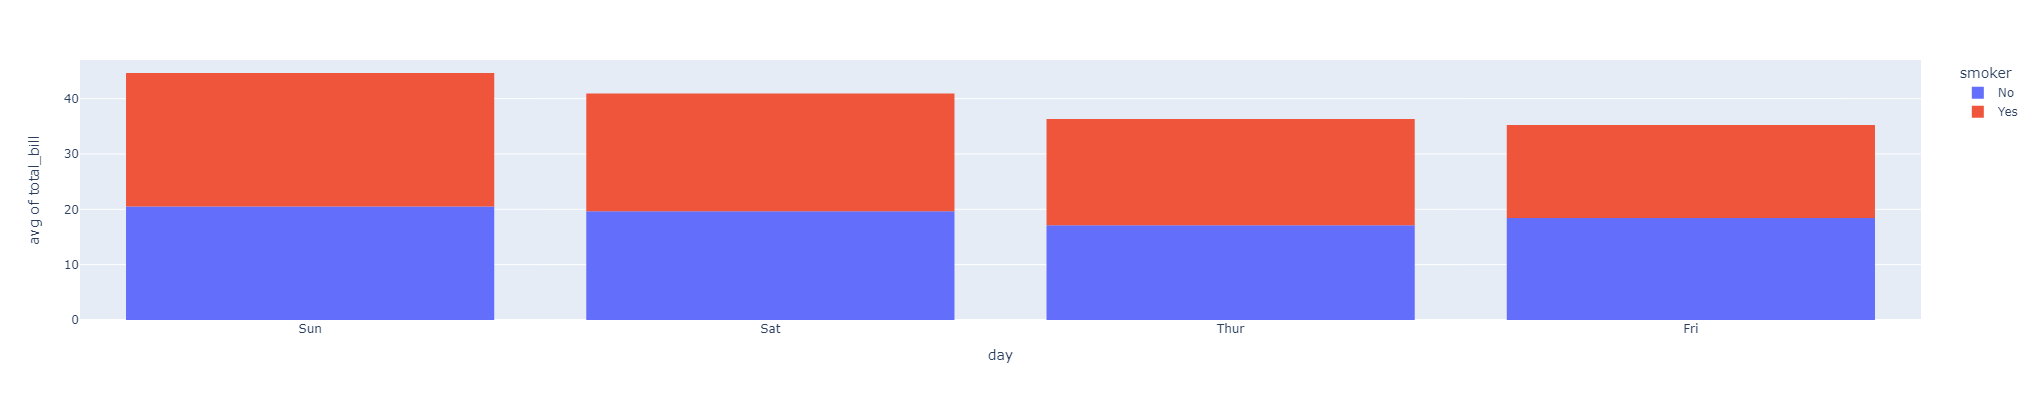

In [167]:
px.histogram(df2, x = 'day', y = 'total_bill', color = 'smoker', histfunc = 'avg', width=800, height=400)

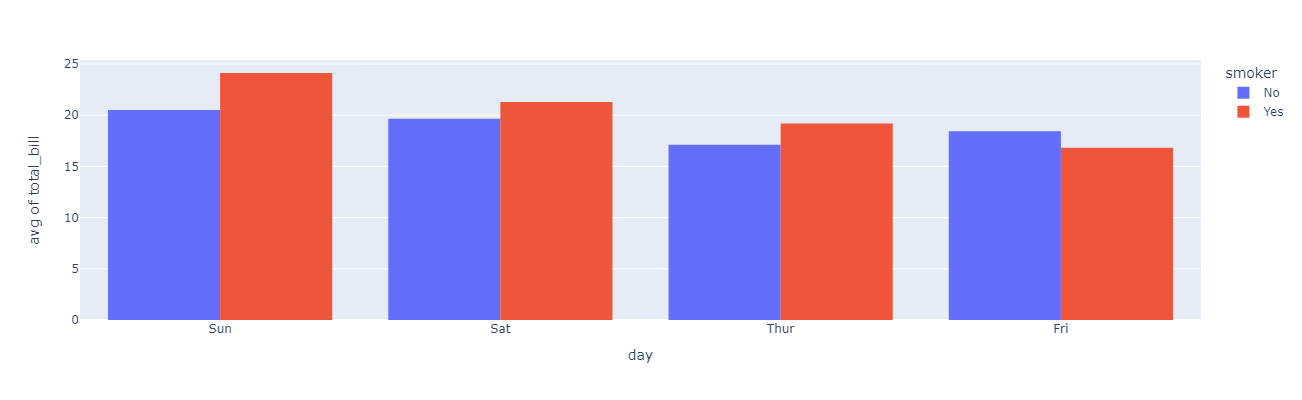

In [168]:
px.histogram(df2, x = 'day', y = 'total_bill', color = 'smoker', histfunc = 'avg', barmode = 'group', width=600, height=400)

#### **Violin, Strip, BoxPlots**

As with Seaborn, we also have these categorical plots available.

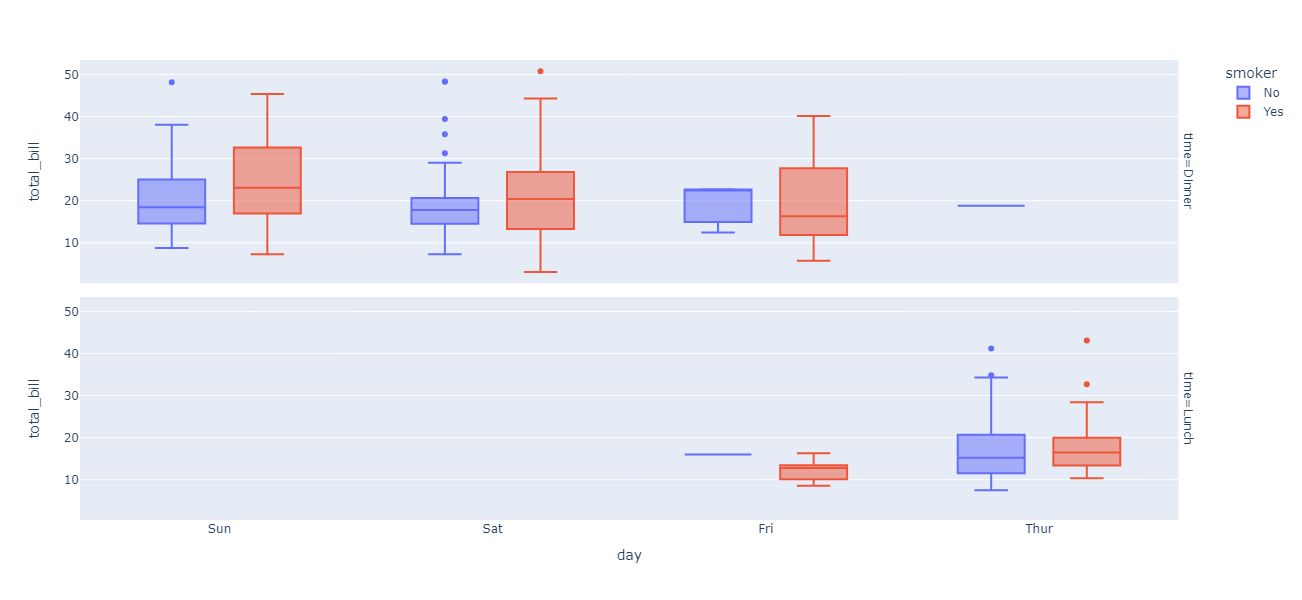

In [172]:
px.box(df2, x = 'day', y = 'total_bill', color = 'smoker', facet_row = 'time',  width=600, height=600)

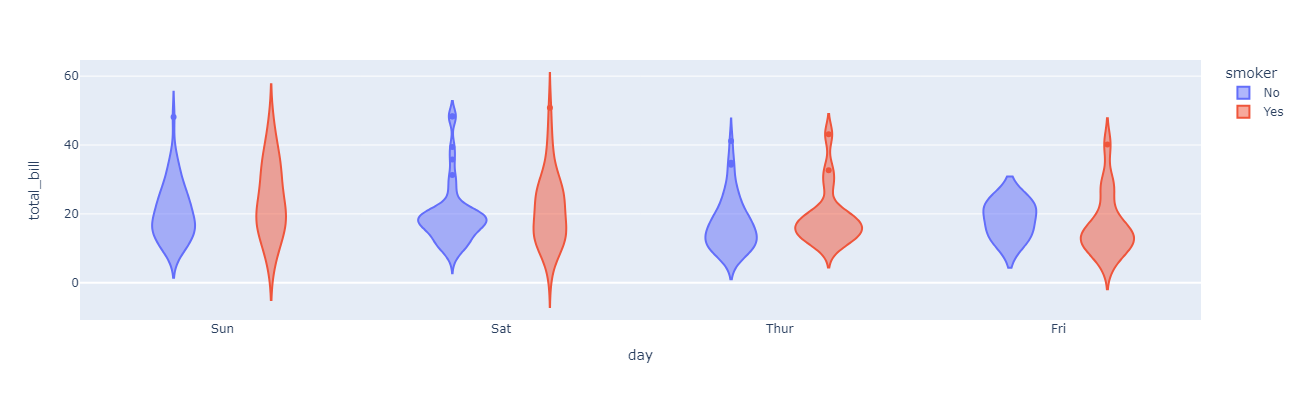

In [174]:
px.violin(df2, x = 'day', y = 'total_bill', color = 'smoker', width=800, height=400)

In [176]:
px.strip(df2, x = 'day', y = 'total_bill', color = 'smoker', width=800, height=400)

#### **03.3. HeatMaps and Density Contours**

For exploring 2D correlations, as with Seaborn, we can use Heatmaps or KDE Area graphs.

In [190]:
px.density_heatmap(df2, x = 'tip', y = 'total_bill', width=800, height=600, text_auto = True, marginal_x = 'histogram', marginal_y = 'histogram')

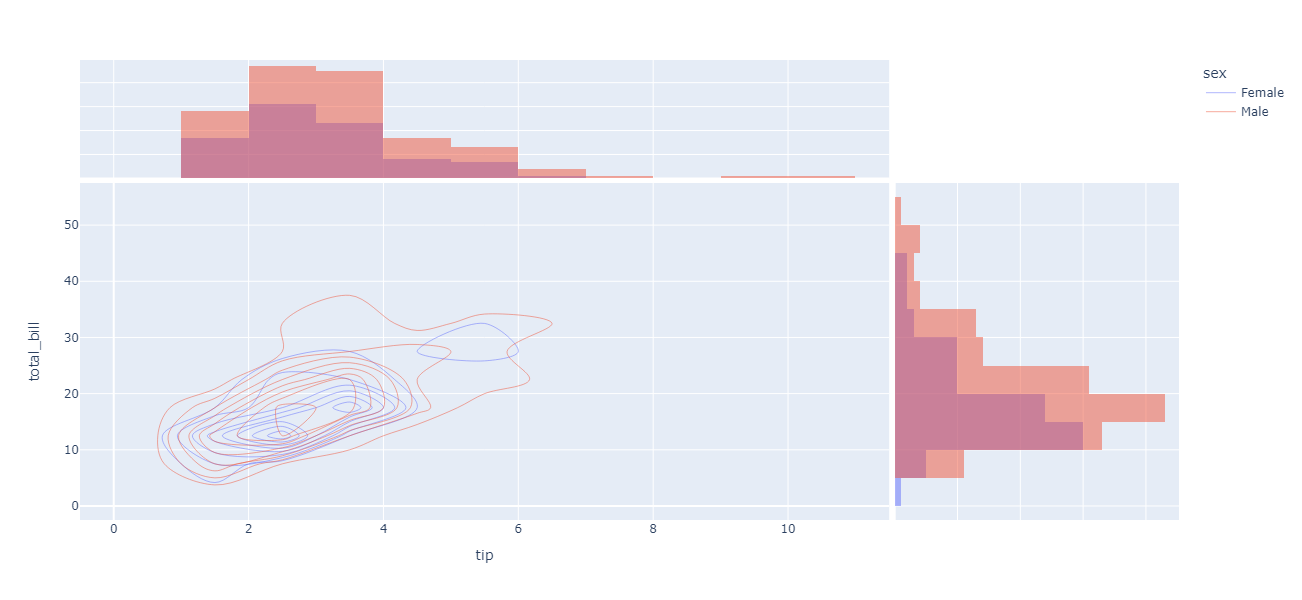

In [192]:
px.density_contour(df2, x = 'tip', y = 'total_bill', color = 'sex', width=800, height=600, text_auto = True, marginal_x = 'histogram', marginal_y = 'histogram')

### **04.4. Styling your Graphs**

Finally, looking at one of the previous violin plots, let'ss see how we can change the style of our graphs, by adding a title, axis labels, changing the style, and so.

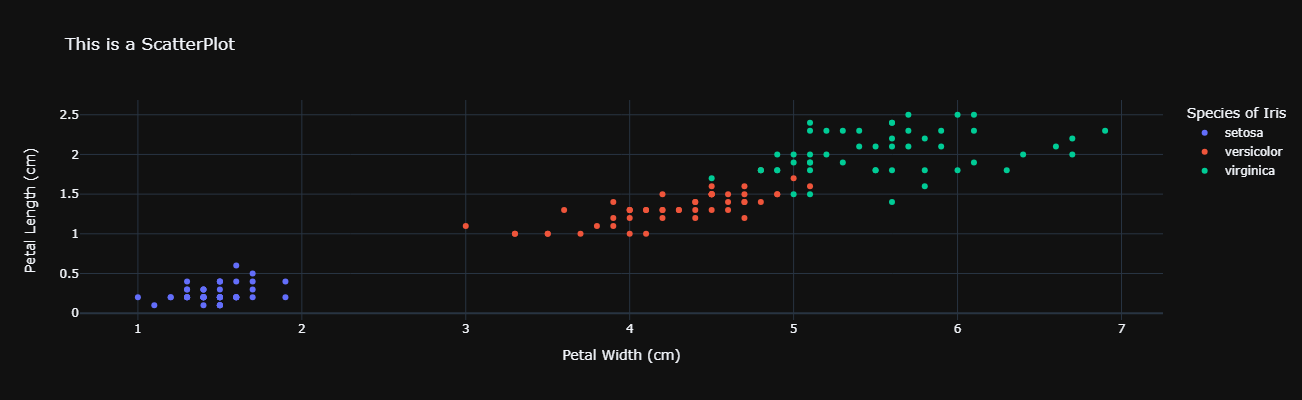

In [198]:
px.scatter(df, x = 'petal_length', y = 'petal_width', color = 'species', width=800, height=400,
          title = 'This is a ScatterPlot',
          labels={
                     "petal_width": "Petal Length (cm)",
                     "petal_length": "Petal Width (cm)",
                     "species": "Species of Iris"
                 },
          template = 'plotly_dark')

The list of templates to consider in PX is the following:

ggplot2, seaborn, plotly, plotly_white, plotly_dark, simple_white, gridon, xgridoff, ygridoff, presentation, and none